<a href="https://colab.research.google.com/github/Darsangmdd/Employee-Clustering/blob/main/HR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EMPLOYEE CLUSTERING**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
dataset = pd.read_csv('HRdata.csv')
dataset.head()

,Unnamed: 0,Gender,Age,Senior,Region,Department,Statu,Martial,Education Level,Disability,Salary
0,0,Male,37,3,Region 1,Department ID: 1,White-Collar,Married,Education Level: 6,No,14968.28
1,1,Male,37,5,Region 1,Department ID: 1,White-Collar,Married,Education Level: 6,No,9352.53
2,2,Male,33,1,Region 1,Department ID: 1,White-Collar,Married,Education Level: 6,No,7814.28
3,3,Male,28,1,Region 1,Department ID: 1,White-Collar,Single,Education Level: 6,No,8545.82
4,4,Female,27,3,Region 1,Department ID: 1,White-Collar,Single,Education Level: 6,No,5756.46


In [2]:
dataset.isnull().sum()

Unnamed: 0         0
Gender             0
Age                0
Senior             0
Region             0
Department         0
Statu              0
Martial            0
Education Level    0
Disability         0
Salary             0
dtype: int64

In [3]:
dataset.columns

Index(['Unnamed: 0', 'Gender', 'Age', 'Senior', 'Region', 'Department',
       'Statu', 'Martial', 'Education Level', 'Disability', 'Salary'],
      dtype='object')

In [4]:
dataset.drop(columns = 'Unnamed: 0', inplace = True)
dataset

,Gender,Age,Senior,Region,Department,Statu,Martial,Education Level,Disability,Salary
0,Male,37,3,Region 1,Department ID: 1,White-Collar,Married,Education Level: 6,No,14968.28
1,Male,37,5,Region 1,Department ID: 1,White-Collar,Married,Education Level: 6,No,9352.53
2,Male,33,1,Region 1,Department ID: 1,White-Collar,Married,Education Level: 6,No,7814.28
3,Male,28,1,Region 1,Department ID: 1,White-Collar,Single,Education Level: 6,No,8545.82
4,Female,27,3,Region 1,Department ID: 1,White-Collar,Single,Education Level: 6,No,5756.46
...,...,...,...,...,...,...,...,...,...,...
596,Male,22,0,Region 1,Department ID: 3,Blue-Collar,Single,Education Level: 4,No,6553.21
597,Male,24,0,Region 1,Department ID: 14,Blue-Collar,Single,Education Level: 4,No,6553.21
598,Male,35,0,Region 1,Department ID: 23,Blue-Collar,Married,Education Level: 3,No,6553.21
599,Male,36,0,Region 1,Department ID: 23,Blue-Collar,Married,Education Level: 5,No,6553.21


In [5]:
data = dataset.copy()

In [6]:
data['Gender'] = data['Gender'].replace({'Male':1,'Female':0})

In [7]:
data

,Gender,Age,Senior,Region,Department,Statu,Martial,Education Level,Disability,Salary
0,1,37,3,Region 1,Department ID: 1,White-Collar,Married,Education Level: 6,No,14968.28
1,1,37,5,Region 1,Department ID: 1,White-Collar,Married,Education Level: 6,No,9352.53
2,1,33,1,Region 1,Department ID: 1,White-Collar,Married,Education Level: 6,No,7814.28
3,1,28,1,Region 1,Department ID: 1,White-Collar,Single,Education Level: 6,No,8545.82
4,0,27,3,Region 1,Department ID: 1,White-Collar,Single,Education Level: 6,No,5756.46
...,...,...,...,...,...,...,...,...,...,...
596,1,22,0,Region 1,Department ID: 3,Blue-Collar,Single,Education Level: 4,No,6553.21
597,1,24,0,Region 1,Department ID: 14,Blue-Collar,Single,Education Level: 4,No,6553.21
598,1,35,0,Region 1,Department ID: 23,Blue-Collar,Married,Education Level: 3,No,6553.21
599,1,36,0,Region 1,Department ID: 23,Blue-Collar,Married,Education Level: 5,No,6553.21


In [8]:
data.Statu = data.Statu.replace({'White-Collar':1,'Blue-Collar':0})
data

,Gender,Age,Senior,Region,Department,Statu,Martial,Education Level,Disability,Salary
0,1,37,3,Region 1,Department ID: 1,1,Married,Education Level: 6,No,14968.28
1,1,37,5,Region 1,Department ID: 1,1,Married,Education Level: 6,No,9352.53
2,1,33,1,Region 1,Department ID: 1,1,Married,Education Level: 6,No,7814.28
3,1,28,1,Region 1,Department ID: 1,1,Single,Education Level: 6,No,8545.82
4,0,27,3,Region 1,Department ID: 1,1,Single,Education Level: 6,No,5756.46
...,...,...,...,...,...,...,...,...,...,...
596,1,22,0,Region 1,Department ID: 3,0,Single,Education Level: 4,No,6553.21
597,1,24,0,Region 1,Department ID: 14,0,Single,Education Level: 4,No,6553.21
598,1,35,0,Region 1,Department ID: 23,0,Married,Education Level: 3,No,6553.21
599,1,36,0,Region 1,Department ID: 23,0,Married,Education Level: 5,No,6553.21


In [9]:
data.Martial.unique()

array(['Married', 'Single'], dtype=object)

In [10]:
data.Martial = data.Martial.replace({'Married':1,'Single':0})

In [11]:
data

,Gender,Age,Senior,Region,Department,Statu,Martial,Education Level,Disability,Salary
0,1,37,3,Region 1,Department ID: 1,1,1,Education Level: 6,No,14968.28
1,1,37,5,Region 1,Department ID: 1,1,1,Education Level: 6,No,9352.53
2,1,33,1,Region 1,Department ID: 1,1,1,Education Level: 6,No,7814.28
3,1,28,1,Region 1,Department ID: 1,1,0,Education Level: 6,No,8545.82
4,0,27,3,Region 1,Department ID: 1,1,0,Education Level: 6,No,5756.46
...,...,...,...,...,...,...,...,...,...,...
596,1,22,0,Region 1,Department ID: 3,0,0,Education Level: 4,No,6553.21
597,1,24,0,Region 1,Department ID: 14,0,0,Education Level: 4,No,6553.21
598,1,35,0,Region 1,Department ID: 23,0,1,Education Level: 3,No,6553.21
599,1,36,0,Region 1,Department ID: 23,0,1,Education Level: 5,No,6553.21


In [12]:
data.Disability.unique()

array(['No', 'Yes'], dtype=object)

In [13]:
data.Disability = data.Disability.replace({'Yes':1,'No':0})

In [14]:
data.Region.unique()

array(['Region 1', 'Region 2'], dtype=object)

In [20]:
data['Region'] = list(map(lambda x: x[-1],data['Region']))

In [22]:
data['Department'] = list(map(lambda x: x[-1],data['Department']))

In [23]:
data['Education Level'] = list(map(lambda x: x[-1],data['Education Level']))

In [24]:
data

,Gender,Age,Senior,Region,Department,Statu,Martial,Education Level,Disability,Salary
0,1,37,3,1,1,1,1,6,0,14968.28
1,1,37,5,1,1,1,1,6,0,9352.53
2,1,33,1,1,1,1,1,6,0,7814.28
3,1,28,1,1,1,1,0,6,0,8545.82
4,0,27,3,1,1,1,0,6,0,5756.46
...,...,...,...,...,...,...,...,...,...,...
596,1,22,0,1,3,0,0,4,0,6553.21
597,1,24,0,1,4,0,0,4,0,6553.21
598,1,35,0,1,3,0,1,3,0,6553.21
599,1,36,0,1,3,0,1,5,0,6553.21


In [25]:
X = data.iloc[:,:].values

# **K-MEANS CLUSTERING**

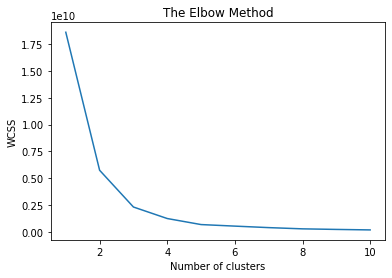

In [26]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
range_n_clusters = [2, 3, 4, 5, 6]

In [30]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [32]:
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.9195574977150741
For n_clusters = 3 The average silhouette_score is : 0.8730708026444672
For n_clusters = 4 The average silhouette_score is : 0.8402073861860571
For n_clusters = 5 The average silhouette_score is : 0.7166083327356237
For n_clusters = 6 The average silhouette_score is : 0.7173949812536399


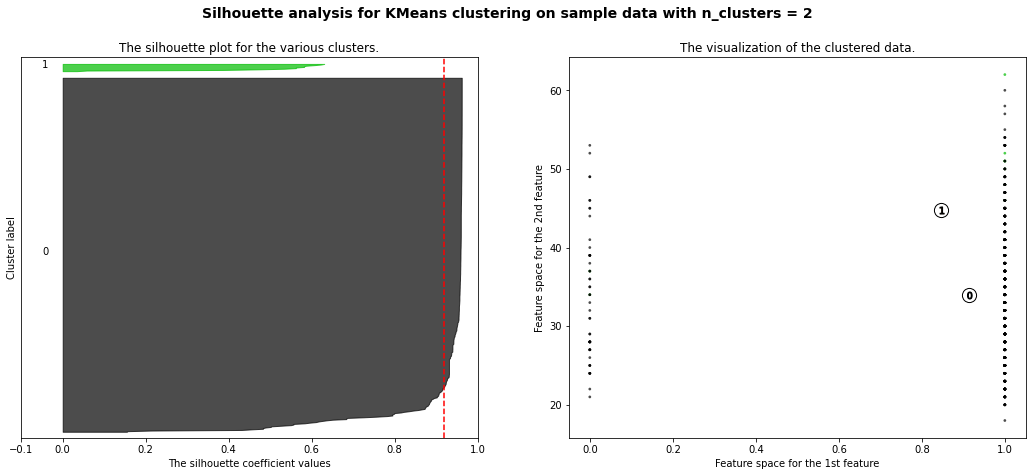

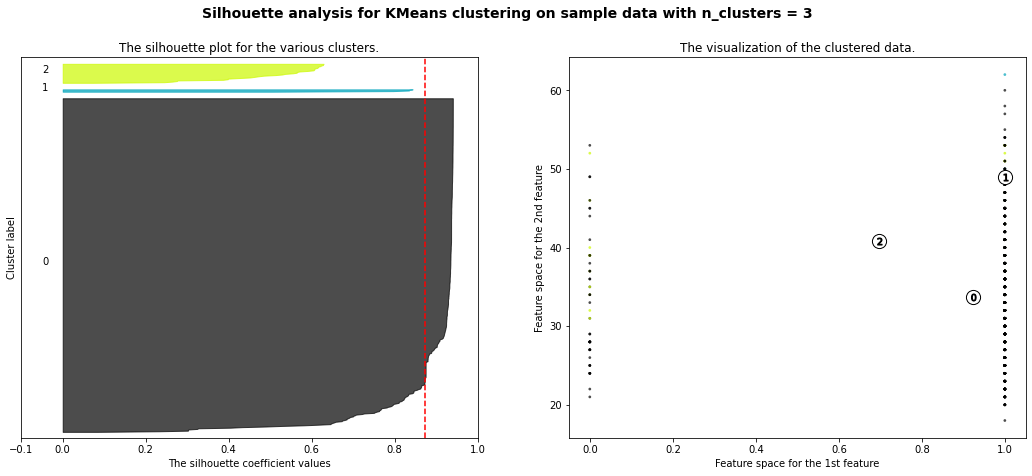

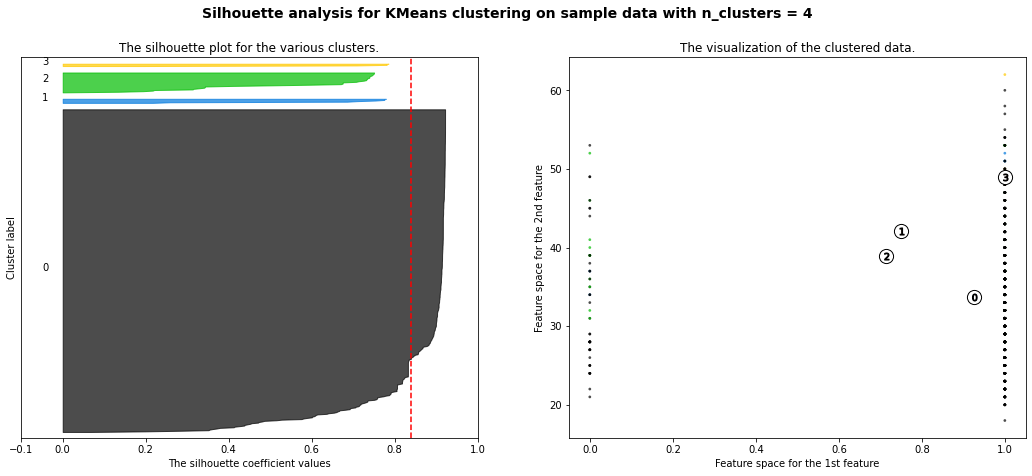

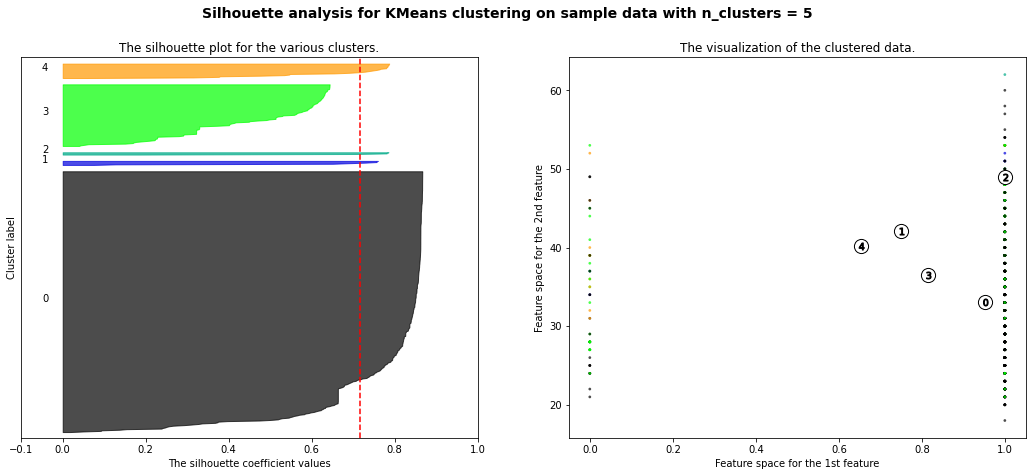

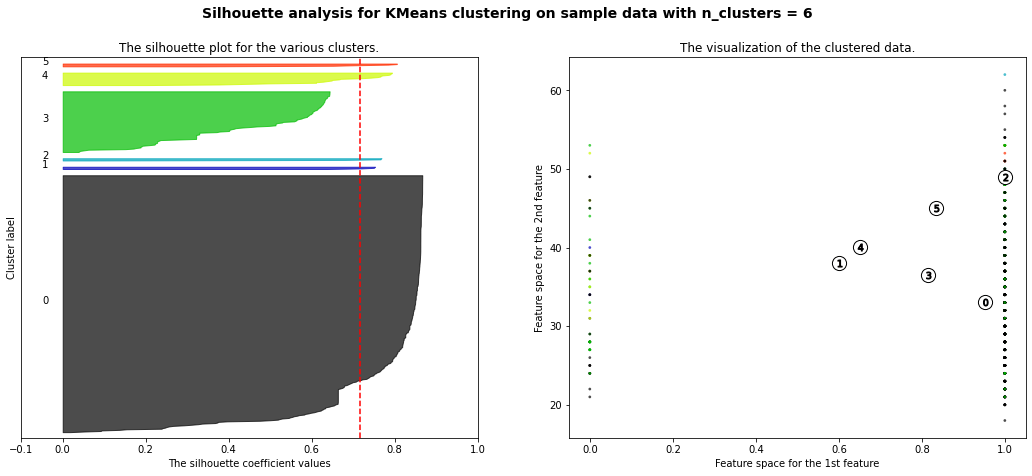

In [33]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [34]:
clusterer = KMeans(n_clusters=2, random_state=10)
cluster_labels = clusterer.fit_predict(X)
print(cluster_labels)

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

# **HIERARCHICAL CLUSTERING**

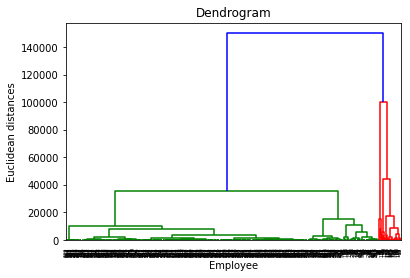

In [37]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Employee')
plt.ylabel('Euclidean distances')
plt.show()

In [39]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [42]:
silhouette_avg = silhouette_score(X, y_hc)
print("For n_clusters =", 2, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.8763833510802035


In [43]:
print(y_hc)

[0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0
 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

# **DBSCAN**

In [67]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=2000,min_samples=50)


labels=dbscan.fit_predict(X)

In [68]:
print(silhouette_score(X,labels))

0.8763833510802035
